In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### Zad 1
#### a)
Interpolacja polega na stworzeniu wielomianu interpolacyjnego, który w punktach (węzłach) przyjmuje taką samą wartość jak nasza pierwotna funkcja. Wielomian ten wykorzystujemy do aproksymacji naszej funkcji.

In [15]:
def f(x):
    return 1/(1 + x**2)


 Na przedziale [-5,5] wybieramy n+1 równoodległych węzłów. Następnie korzystając z tych węzłów tworzymy macierz Vandermonda. 
 Dla każdego węzła x obliczamy również wartość funkcji f(x). Wartości zapisujemy w y.
 Rozwiązując układ równań vander * a = y otrzymujemy wektor a zawierający współczynniki wielomianu interpolacyjnego


In [16]:
def interpolate(n):
    knots = np.linspace(-5, 5, n + 1)
    vander = np.vander(knots, increasing=True)
    y = f(knots)
    
    return np.linalg.solve(vander,y)

Żeby obliczyć wartości wielomianu interpolacyjnego w x punktach, obliczamy nową macierz vandermonda dla tych punktów (tym razem nie kwadratową, drugi wymiar to liczba współczynników a), a następnie obliczamy iloczyn skalarny tej macierzy z macierzą współczynników a.

In [17]:
def p(x, a, n):
    return np.dot(np.vander(x, N=n+1, increasing=True), a)


Mając współczynniki wielomianu interpolacyjnego możemy policzyć jego wartość w dowolnym punkcie naszego przedziału.
 Rysujemy na wykresie wartości wielomianu p(x) oraz funkcji f(x) dla 1000 równoodległych punktów
        

In [18]:
def interpolation_plot(n):
    x = np.linspace(-5, 5, 1000)

    a = interpolate(n)

    plt.plot(x, p(x, a, n))
    plt.plot(x, f(x))
    plt.show()

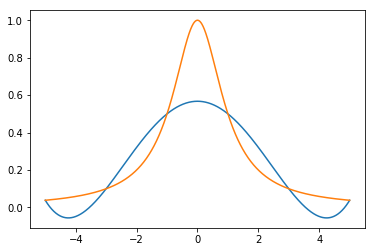

In [19]:
interpolation_plot(5)

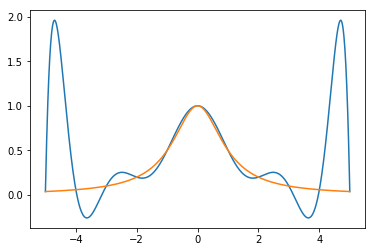

In [4]:
interpolation_plot(10)

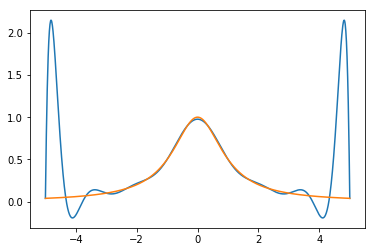

In [5]:
interpolation_plot(15)

Jak widać na powyższych rysunkach wraz ze wzrostem liczby n, dokładność wielomianu względem funkcji rośnie w środkowej części przedziału i maleje na jego brzegach. Zjawisko to nazywamy efektem Rungego, jest ono typowe dla interpolacji wielomianów wysokich stopni, zwłaszcza dla równoodległych węzłów.

#### b)
Obliczamy różnicę między wartościami wielomianu interpolacyjnego oraz funkcji f

In [6]:
def interpolation_remainder_plot(n):
    x = np.linspace(-5, 5, 1000)

    a = interpolate(n)

    remainder = [abs(f(x[i]) - p(x, a, n)[i]) for i in range(len(x))]
    
    plt.plot(x, remainder, color='green')
    plt.show()

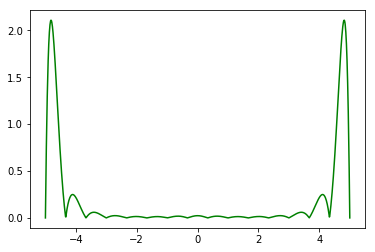

In [7]:
interpolation_remainder_plot(15)

Na wykresie doskonale widać zachodzący efekt Rungego. Różnice na końcach przedziału są ogromne i symetryczne, a w środkowej części przedziału są minimalne.


### Zad 2
Podobnie jak w poprzednim zadaniu tworzyć będziamy wielomian interpolacyjny. Tym razem zamiast wybierać równoodległe węzły, będziemy wybierać je za pomocą funkcji Czebyszewa, co powinno zminimalizować efekt Rungego.

In [8]:
def czeb(a, b, k, n):
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(((2 * k - 1)/(2 * n) * np.pi))

Poniższa funkcja różni się od tej z zadania pierwszego tylko sposobem wyboru węzłów (wektor x)

In [20]:
def czeb_knots_interpolation(n):
    x = np.array([czeb(-5, 5, k, n) for k in range(1, n+1)])
    y = f(x)

    vander = np.vander(x, increasing=True)
    a = np.linalg.solve(vander, y)

    z = np.linspace(-5, 5, 1000)

    plt.plot(z, p(z, a, n - 1))
    plt.plot(z, f(z))
    plt.show()

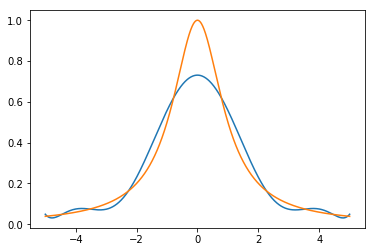

In [10]:
czeb_knots_interpolation(10)

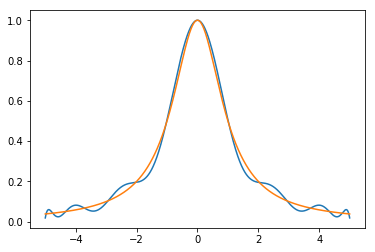

In [11]:
czeb_knots_interpolation(15)

Jak widać udało nam się zminimalizować efekt Rungego. Jest to zasługą funkcji Czebyszewa dzięki której wybierane węzły nie są równoodległe, a ich zagęszczenie wzrasta na krańcach przedziału

### Zad 3

In [7]:
def x(a, t): return a * np.cos(t)

def y(b, t): return b * np.sin(t)

In [8]:
a = 1
b = 3

Funkcja generująca zestaw punktów, które będą potrzebne do interpolacji.

In [13]:
def generate_points(a, b, n):
    t_points = np.linspace(0, 2*np.pi, n)
    x_points = x(a, t_points)
    y_points = y(b, t_points)
    return t_points, x_points, y_points

Generujemy punkty, które wykorzystamy do interpolacji i punky które wykorzystamy do narysowania krzywej.

In [15]:
t_points, x_points, y_points = generate_points(a,b,10)
t_plot, x_plot, y_plot = generate_points(a, b, 30)

Do obliczenia funkcji interpolacyjnej użyjemy klasy CubicSpline, która wykorzystuje sześcienne funkcji sklejane.
Robimy to osobno dla par (x,t) oraz (y,t)

In [16]:
x_cs = CubicSpline(t_points, x_points, bc_type='periodic')
y_cs = CubicSpline(t_points, y_points, bc_type='periodic')

Rysujemy rezultat dla większej liczby punktów żeby rysunek był dokładniejszy.

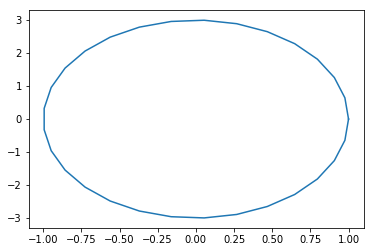

In [21]:
plt.plot(x_cs(t_plot), y_cs(t_plot))
plt.show()

Dla porównania rysunek punków wygenerowanych przez nasze funkcji x() i y()

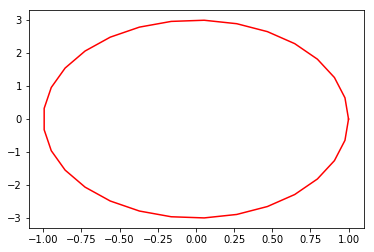

In [18]:
plt.plot(x_plot, y_plot,'r')
plt.show()

Oba rysunki nałożone na siebie, widać że krzywa wygenerowana przez funkcje interpolacyjną pokrywa się z krzywą wygenerowaną przez funkcje x(), y()

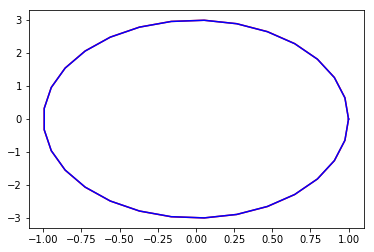

In [19]:
plt.plot(x_plot, y_plot, 'r')
plt.plot(x_cs(t_plot), y_cs(t_plot), 'b')
plt.show()

## Wnioski:
* Interpolacja wielomianami jest przydatna, lecz ma wady np. efekt Rungego
* Istnieją efektywne metody radzenia sobie z tymi wadami, np wykorzystanie wielomianu Czebyszewa do ustalenia rozkładu węzłów
* Interpolacja sześciennymi funkcjami sklejanymi umożliwia interpolacje krzywych